<ipython-input-166-00e1d0f74a12>:57: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  plAnk[i] = (plAnk[i].hour * 60 + plAnk[i].minute) * 60 + plAnk[i].second
<ipython-input-166-00e1d0f74a12>:58: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  fakAnk[i] = (fakAnk[i].hour * 60 + fakAnk[i].minute) * 60 + fakAnk[i].second


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

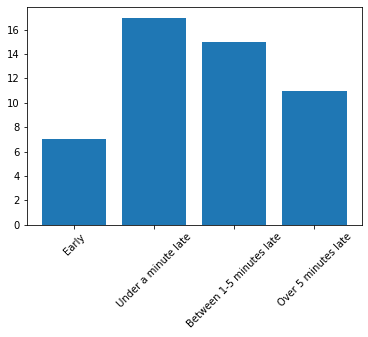

In [166]:
import numpy as np
import pandas as panda 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import time
import datetime

dataframe = panda.read_csv("Ruter_data.csv")

# Lager nytt datasett med ankomstInformasjon
# Feature 1

# Choose relevant data
plAnk = dataframe['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] 
fakAnk = dataframe['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']

# Choose only the first 50 elements
plAnk = plAnk[:50] 
fakAnk = fakAnk[:50]

# replaces 24 with 00 and 25 with 01 in plAnk
for index, time in enumerate(plAnk) :
    hour = time[:2] # first two numbers of the time
    
    if(hour == '24') :
        time = time.replace('24','00')
        plAnk[index] = time
        
    if(hour == '25') :
        time = time.replace('25', '01')
        plAnk[index] = time

        
# replaces 24 with 00 and 25 with 01 in fakAnk
for index, time in enumerate(fakAnk) :
    hour = time[:2] # first two numbers of the time
    
    if(hour == '24') :
        time = time.replace('24','00')
        fakAnk[index] = time
        
    if(hour == '25') :
        time = time.replace('25', '01')
        fakAnk[index] = time
        
            
# Convert to datetime.time 
plAnk = panda.to_datetime(plAnk)
plAnk = plAnk.dt.time
fakAnk = panda.to_datetime(fakAnk)
fakAnk = fakAnk.dt.time


# Nå er veridene datetime.time
# Let's convert the datetime to seconds
for i,v in enumerate(plAnk) :
    plAnk[i] = (plAnk[i].hour * 60 + plAnk[i].minute) * 60 + plAnk[i].second
    fakAnk[i] = (fakAnk[i].hour * 60 + fakAnk[i].minute) * 60 + fakAnk[i].second


# Now we will filter the timestamps based on the
# difference between expected and actual arrival time

# Variable to save each case
lessThanOne = 0
betwOneAndFive = 0
overFive = 0
lessThanZero = 0

# sort the time values
for i, v in enumerate(plAnk):
    # calculate how late the bus is
    diff = fakAnk[i] - plAnk[i]
    
    # handle each case
    
    # if difference is negative
    if(diff < 0):
        lessThanZero += 1
        
    # if difference is less than a minute
    elif(diff < 60) :
        lessThanOne += 1
        
    # if difference is between a minute and 5
    elif(diff > 60 and diff < 300):
        betwOneAndFive += 1
        
    # if difference is bigger
    else:
        overFive += 1


# Array with the differences
diffArray = [lessThanZero, lessThanOne, betwOneAndFive, overFive]
xLabels = ['Early', 'Under a minute late', 'Between 1-5 minutes late', 'Over 5 minutes late']
plt.bar(xLabels, diffArray)
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Antall holdeplasser på hvert område')

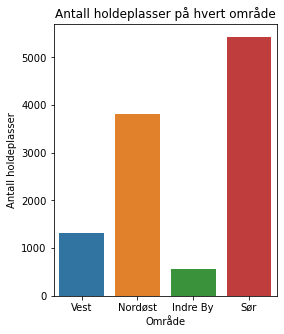

In [105]:
# Feature 1



# extract relevant data from the ruter dataset
dataframe = dataframe[['Område', 'Holdeplass_Fra']]

omrader = dataframe['Område'].unique() # 4 unique values in 'Områder'

#count the busstops in each of the 4 områder
#variables to count each
omr1 = 0
omr2 = 0
omr3 = 0
omr4 = 0

# calculate how many holdeplass there are in each område
for index, value in enumerate(dataframe['Område']) :
    
    if(dataframe['Område'][index] == omrader[0]) :
        omr1 += 1
        
    if(dataframe['Område'][index] == omrader[1]) :
        omr2 += 1
        
    if(dataframe['Område'][index] == omrader[2]) :
        omr3 += 1
        
    else :
        omr4 += 1


# Creating an array with the 'omr'-values
omrCount = [omr1, omr2, omr3, omr4]

# Creating a new array with områder and omrCount
nyarray = [omrader, omrCount]

# A barplot will best vizualise this data
fig, ax = plt.subplots(figsize=(4,5))
sns.barplot(x = nyarray[0], y = nyarray[1])
plt.xlabel('Område')
plt.ylabel('Antall holdeplasser')
plt.title('Antall holdeplasser på hvert område')

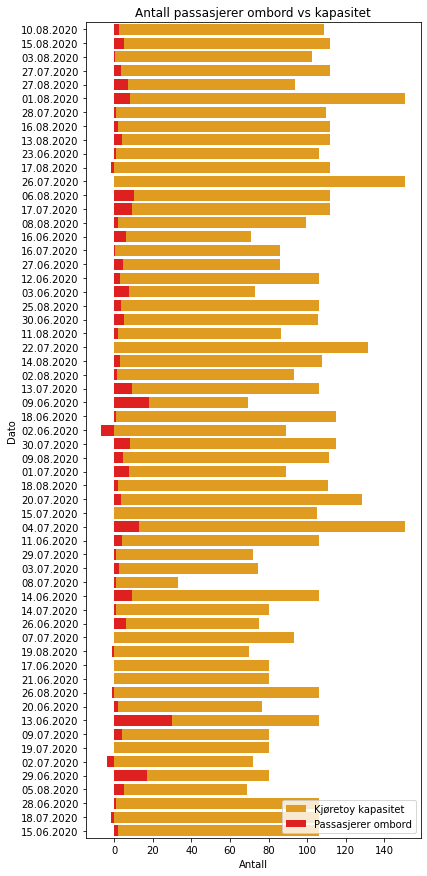

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as panda

# Reading the csv file
dataframe = panda.read_csv("Ruter_data.csv")

# //////// FEATURE AND VIZULIZATION 1 
# Comparing the capasity of the buses to the number of people embarking/disembarking the bus


# save relevant columns in their own arrays
# so its easier to pick out the first 100 later
pasOmb = dataframe['Passasjerer_Ombord']
kjorKap = dataframe['Kjøretøy_Kapasitet']
dato = dataframe['Dato']


f, ax = plt.subplots(figsize = (6,15)) # configuring the graph's size

# barplots, where i pick out the first 100 values
sns.barplot(x = kjorKap[:100], y= dato[:100], label = 'Kjøretoy kapasitet',
            color = 'orange', ci=None)
sns.barplot(x = pasOmb[:100], y= dato[:100], label = 'Passasjerer ombord',
            color = 'red', ci=None)
ax.legend(ncol = 1, loc = 'lower right') # color explanation 
plt.title("Antall passasjerer ombord vs kapasitet") # graph title
plt.xlabel("Antall") # x axis label
plt.show() # display graph, don't need this to display though?

# We see that there were a lot of passengers at some point on 13th June 2020.
# Let's dive further into that


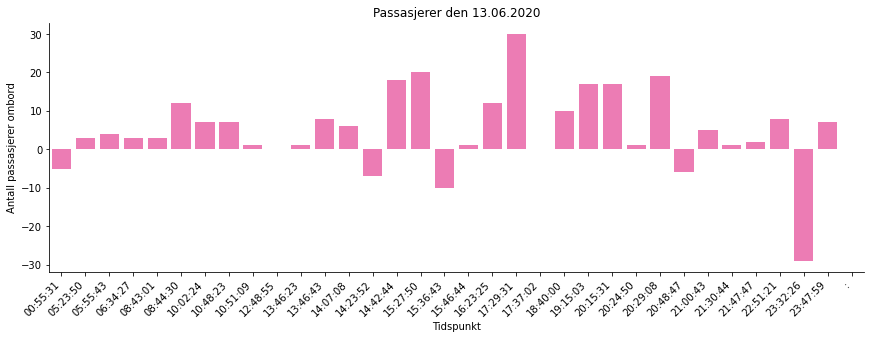

In [133]:
# //////// FEATURE AND VIZULIZATION 2
# Now we will attempt to see at what time on 13.06.20 
# the most people were on the bus (using 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra')

# extract the information useful to us
dateTimePas = dataframe[['Dato', 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra', 'Passasjerer_Ombord']]

# filter for date
datoFilter = (dateTimePas['Dato'] == '13.06.2020')
riktigDato = dateTimePas[datoFilter] # riktigDato contains the interesting values now

# plots the graph
graph = sns.catplot(data = riktigDato, x = 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra', 
                    y = 'Passasjerer_Ombord', kind='bar',
           height=4, aspect=3, ci=None, color='hotpink')

# rotates the timestamps so they fit
graph.set_xticklabels(rotation=45, horizontalalignment='right')
plt.xlabel('Tidspunkt') 
plt.ylabel('Antall passasjerer ombord')
plt.title('Passasjerer den 13.06.2020')
plt.show()

# We see here that the most passengers were aboard at 17:29:31 

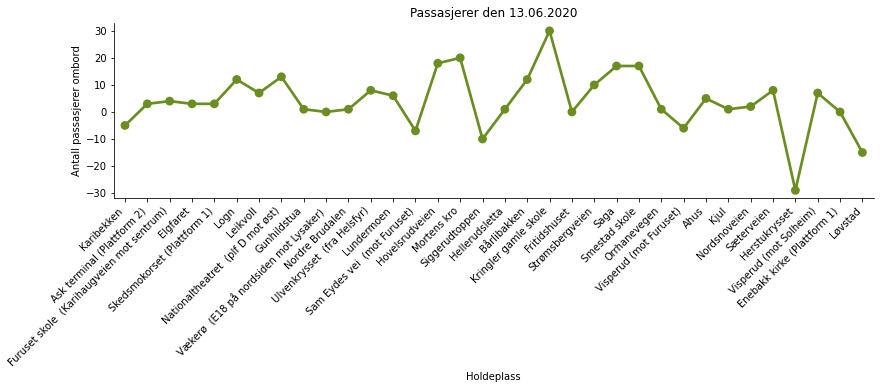

In [118]:
# Feature 3
# Interested in finding which stop has the most people aboard the bus on 13th june
# we will use holdeplass_fra

# extract the information useful to us
dateHoldPas = dataframe[['Dato', 'Holdeplass_Fra', 'Passasjerer_Ombord']]

# filter the date
datoFilter = (dateHoldPas['Dato'] == '13.06.2020')
riktigDato = dateHoldPas[datoFilter]

# plots the graph
graph = sns.catplot(data = riktigDato, x= 'Holdeplass_Fra', 
                    y = 'Passasjerer_Ombord', kind='point', color='olivedrab',
           height=3, aspect=4, ci=None)

# rotates the timestamps so they fit
graph.set_xticklabels(rotation=45, horizontalalignment='right')
plt.xlabel('Holdeplass') 
plt.ylabel('Antall passasjerer ombord')
plt.title('Passasjerer den 13.06.2020')
plt.show()

# Here we see that the stop 'Kringler Gamle Skole' had the most people board on that day

In [165]:
dato = dataframe[['Dato', 'Passasjerer_Ombord']]

dato = (dato['Dato'][3:5] == '08')

dato.head(25)

4063    False
4295    False
Name: Dato, dtype: bool